# ビデオゲームの初めての分析

このファイルでビデオゲームの商売データセットを初めての分析を行う。元のデータはこのサイトで？？見ることができる。このファイルの目標はpandasとpythonの機能を使って、簡単な分析をすることだった。

In [1]:
# 必要なパッケージを読みこむ
import numpy as np 
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

## 欠損値の前処理

データに欠損値があるかどうか調べてみる。

In [2]:
# データを読みこむ
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
# 各変数の欠損値の和を見る
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

欠損値はいっぱいある。ご覧の通り、 Critic_Score, Critic_Count,　User_score,　User_Count,　Developer,　Rating　には欠損値がそんなにあるので、これらの変数を相関関係や他の分析のために使えないかもしれない。

欠損値は面白い質問に導く。例えば、どうしてNameには2だけの欠損値がある？そして、どうしてRatingにはそんなに欠損値がある？全てのゲームにはRatingが付けられているんじゃない？これを知る方法はデータのサイトを見るしかない。

ですが、どうやって欠損値を処理するのはもっと大切な質問だ。僕の意見では、商売のデータには欠損値がないので、分析は進める。そして、もし欠損値がある変数を使ったら、それらの変数の欠損値を埋められる。

もし、掃除されたデータを使いたかったら、欠損値がないデータセットを作ろう。

In [4]:
# 欠損値なしのdfを作る
games_c = games.dropna()

In [5]:
# 掃除されたdfを書き出す
games_c.to_csv('Video_Game_Sales_Clean.csv')

欠損値なしのVideo_Games_Sales_Clean.csvを使うことができる。

## 色々な発見

### 最大商売ゲーム

ここで、最大商売を受けたゲームを探してみる。

In [6]:
# NAのゲーム
[games.iloc[games.NA_Sales.idxmax()].Name, 
 games.iloc[games.NA_Sales.idxmax()].NA_Sales, 
 games.iloc[games.NA_Sales.idxmax()].Year_of_Release]

['Wii Sports', 41.359999999999999, 2006.0]

In [7]:
# 日本のゲーム
[games.iloc[games.JP_Sales.idxmax()].Name, 
 games.iloc[games.JP_Sales.idxmax()].JP_Sales,
 games.iloc[games.JP_Sales.idxmax()].Year_of_Release]

['Pokemon Red/Pokemon Blue', 10.220000000000001, 1996.0]

In [8]:
 # その他のゲーム
[games.iloc[games.Other_Sales.idxmax()].Name, 
 games.iloc[games.Other_Sales.idxmax()].Other_Sales,
games.iloc[games.Other_Sales.idxmax()].Year_of_Release]

['Grand Theft Auto: San Andreas', 10.57, 2004.0]

In [9]:
# 全商売のゲーム
[games.iloc[games.Global_Sales.idxmax()].Name, 
 games.iloc[games.Global_Sales.idxmax()].Global_Sales,
games.iloc[games.Global_Sales.idxmax()].Year_of_Release]

['Wii Sports', 82.530000000000001, 2006.0]

ご覧の通り、Wii Sports（約８２万ユニット）は商売の戦場で勝った。そして、NAにもWii Sportsは最大商売を受けた（約４１万ユニット）。だが、日本ではPokemon Red/Pokemon Blue（約１０万ユニット）が最大商売を持った。その他の最大商売はGrand Theft Auto: San Andreas（約１０万ドール）だった。

下の棒グラフで最大商売をよく見ることができる。

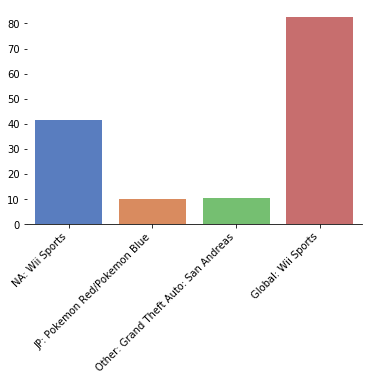

In [50]:
# 棒グラフのためのデータ
y_sales = [games.iloc[games.NA_Sales.idxmax()].NA_Sales,
          games.iloc[games.JP_Sales.idxmax()].JP_Sales,
          games.iloc[games.Other_Sales.idxmax()].Other_Sales,
          games.iloc[games.Global_Sales.idxmax()].Global_Sales]

x_name_year = ['NA: ' + games.iloc[games.NA_Sales.idxmax()].Name,
              'JP: ' +  games.iloc[games.JP_Sales.idxmax()].Name,
              'Other: ' + games.iloc[games.Other_Sales.idxmax()].Name,
              'Global: ' + games.iloc[games.Global_Sales.idxmax()].Name]

# 最大商売の棒グラフ
sales_b = sns.barplot(x=x_name_year, 
            y=y_sales,
           palette="muted")
sales_b.set_xticklabels(sales_b.get_xticklabels(), rotation=45, ha="right")
sns.despine(left = True)
plt.show()

ご覧の通り、Wii Sportsは一番商売されたゲームだ。どうしてWii Sportsそんなに成功したのかね？　この記事によると、？？

### 出版社の最大商売

次に全世界の最大商売を受けた出版社を調べる。

In [10]:
# 出版社のグループにデータを分類する・まとめる
pub_group = games.Global_Sales.groupby(games.Publisher)

In [18]:
# 順番にする
pub_sum_s = pub_group.sum().sort_values(ascending = False)

In [20]:
# 第一の十出版社
pub_sum_s.head(10)

Publisher
Nintendo                        1788.81
Electronic Arts                 1116.96
Activision                       731.16
Sony Computer Entertainment      606.48
Ubisoft                          471.61
Take-Two Interactive             403.82
THQ                              338.44
Konami Digital Entertainment     282.39
Sega                             270.35
Namco Bandai Games               254.62
Name: Global_Sales, dtype: float64

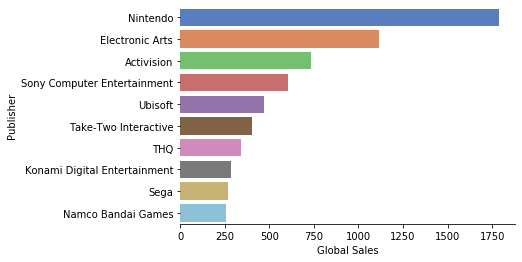

In [21]:
# 棒グラフでデータを目撃する
sns.barplot(x = pub_sum_s.head(10).values,
            y=pub_sum_s.head(10).index, 
            palette="muted")
sns.despine(left = True)
plt.xlabel('Global Sales')
plt.show()

ご覧の通り、任天堂は何の出版社よりも商売を受けた。

### Ratingのデータ

よく商売を受けたRatingを調べる。

In [22]:
# データをRatingのグループにまとめる
rat_group = games.Global_Sales.groupby(games.Rating)

In [24]:
# 順番にする
rat_sum_s = rat_group.sum().sort_values(ascending = False)

In [25]:
# 第一の5のRating
rat_sum_s.head(5)

Rating
E       2436.90
T       1494.40
M       1473.84
E10+     655.81
K-A        4.33
Name: Global_Sales, dtype: float64

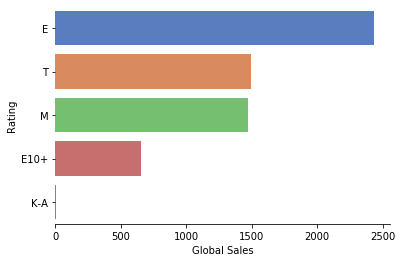

In [26]:
# 棒グラフで可視化しよう
sns.barplot(x = rat_sum_s.head(5).values,
            y=rat_sum_s.head(5).index, 
            palette="muted")
sns.despine(left = True)
plt.xlabel('Global Sales')
plt.show()

Eは一番売られたRatingだ。

### プラットフォームと出版年

プラットフォームの商売がどうやって出版年と変わっていくのかを調べる。

In [27]:
# プラットフォームはいくらある
len(games.Platform.unique())

31

In [28]:
# プラットフォームを商売のグループに分ける
plat_g = games.Global_Sales.groupby(games.Platform)

In [31]:
# 順番にする
plat_s = plat_g.sum().sort_values(ascending = False)

In [32]:
# どれのプラットフォームが最大商売を受けた
plat_s.head()

Platform
PS2     1255.64
X360     971.63
PS3      939.43
Wii      908.13
DS       807.10
Name: Global_Sales, dtype: float64

In [33]:
# 一番いいプラットフォームを保存する
b_plats = plat_s.head().index

In [34]:
# DFを印刷する
top_plats_df = games.copy()

In [35]:
# 一番いいプラットフォームだけを持つDF
g_plats = games.Platform.values
for i in list(range(len(games))):
    if g_plats[i] not in b_plats:
        top_plats_df.drop(i , inplace = True)

In [36]:
# 一番いいプラットフォームだけを持つDFのプラットフォームを確認する
o_set = set(top_plats_df.Platform.unique())
n_set = set(b_plats)

In [42]:
# 異なる元素がないと確認しよう
len(o_set.intersection(n_set)) == len(o_set)

True

集合は同じなので、確認できた。

次に折れ線グラフでプラットフォームの世界商売を見よう。

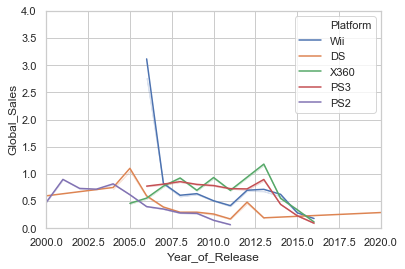

In [47]:
# プラットフォームの全世界商売を比較するための折れ線グラフ
sns.set()
sns.set_style("whitegrid")
sns.lineplot(x="Year_of_Release", 
             y="Global_Sales", 
             hue="Platform", 
             data=top_plats_df,
            ci = False).set(ylim = (0,4) , xlim =  (2000, 2020))
plt.show()

面白いこと、Wiiの商売はすごく大きかったが、出発の時から商売が減っていった。X360は平均的に商売を受け取った。

### 商売と批判の関係

ここで、商売と批判の変数の間に相関係があるかどうかを調べる。

In [48]:
# 全商売と批判スコアの相関関係数
games_c.Global_Sales.corr(games_c.Critic_Score)

0.23755572228274255

In [49]:
#全商売とユーザースコアの相関関係数
games_c.Global_Sales.corr(games_c.User_Score)

0.088348526346967243

普通は相関係数が０．4より小さかったら、相関係が弱いという。なので、ここには相関係が弱いしか言えない。

Global_Salesとの間には相関係が弱いけど、JP_SalesとNA_Salesとの間の相関係も調べた。

In [52]:
# 日本商売と批判スコアの相関関係数
games_c.JP_Sales.corr(games_c.Critic_Score)

0.14731394007125062

In [53]:
#　日本商売とユーザースコアの相関関係数
games_c.JP_Sales.corr(games_c.User_Score)

0.12752142443653175

In [54]:
#　NA商売と批判スコアの相関関係数
games_c.NA_Sales.corr(games_c.Critic_Score)

0.23358030894145293

In [55]:
#　NA商売とユーザースコアの相関関係数
games_c.NA_Sales.corr(games_c.User_Score)

0.085796010919863275

ご覧の通り、これらの変数の間にも相関関係が弱いしか言えない。

### 線形回帰

次に、全世界商売を目的数として、Critic_ScoreとUser_Scoreを説明数として、線形回帰のモデルを作る。